<span style="color: cyan"> ## Zadanie 1

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Zauwazmy ze niby te dane sa rozproszone jednak wezmy pod uwage ze dane sa 2D a etykieta jest 3cim wymiarem.
Biorac pod uwage kolor (przejscie gradientu) jest potencjal na to ze te dane sa mniej wiecej liniowo zalezne
ale wedlug jakiejs plaszczyzny a nie linii. Jeden outlier zolty.

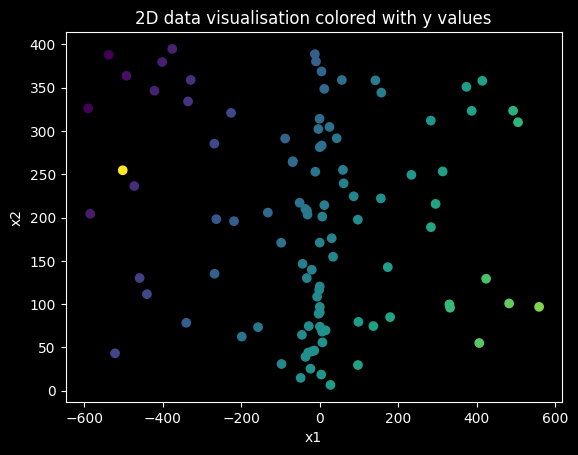

In [37]:
np.random.seed(42)
data_1 = pd.read_csv('data1.csv', header=0)
# X, y = data_1.iloc[:, [0, 1]], data_1.iloc[:, [2]]
X, y = data_1[['x1', 'x2']], data_1[['y']]
plt.scatter(X['x1'], X['x2'], c=y['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D data visualisation colored with y values')
plt.show()

Upewnijmy sie czy wykres rzeczywisice jest liniowo zalezny bo mozemy stworzyc wykres 3D

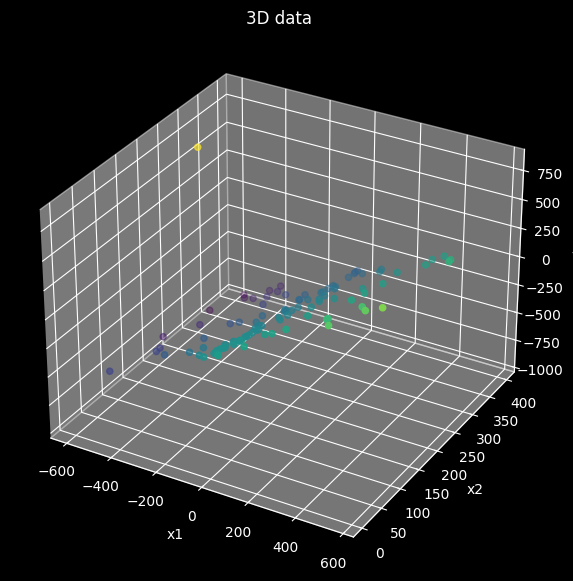

In [38]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['x1'], X['x2'], y['y'], c=y['y'], cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('3D data')
plt.show()

### zadanie 1.2

In [39]:
def preprocess_data(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    joined_data = np.hstack((X_train, y_train.reshape(-1, 1)))
    mean = np.mean(joined_data, axis=0)
    std = np.std(joined_data, axis=0)
    upper_bound = mean + 3.0 * std
    lower_bound = mean - 3.0 * std
    within_vals = (joined_data >= lower_bound) & (joined_data <= upper_bound)
    indices = np.all(within_vals, axis=1)

    X_train_no_outliers = X_train[indices]
    y_train_no_outliers = y_train[indices]

    return X_train_no_outliers, y_train_no_outliers

## <span style="color: cyan">zadanie 2

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train_no_outliers, y_train_no_outliers = preprocess_data(X_train, y_train)
results = []

In [41]:
def get_result_entry(model, X, y, model_name='Custom'):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2_score = round(model.score(X, y), 5)

    return {'Model': model_name, 'MSE': mse, 'R2 Score': r2_score}

Base model - simple mean

In [42]:
base_model = DummyRegressor(strategy='mean')
base_model.fit(X_train, y_train)

entry_base = get_result_entry(base_model, X_test, y_test, model_name='Baseline')
results.append(entry_base)

In [43]:
base_model_pre = DummyRegressor(strategy='mean')
base_model_pre.fit(X_train_no_outliers, y_train_no_outliers)

entry_base_pre = get_result_entry(base_model_pre, X_test, y_test, model_name='Baseline clean')
results.append(entry_base_pre)

Linear Regression models - first without preprocessing, second with

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

entry_lr = get_result_entry(lin_reg, X_test, y_test, model_name='Linear Regression')
results.append(entry_lr)

Skorzystajmy z danych po preprocessingu

In [45]:
lin_reg_pre_data = LinearRegression()
lin_reg_pre_data.fit(X_train_no_outliers, y_train_no_outliers)

entry_lr_pre = get_result_entry(lin_reg_pre_data, X_test.values, y_test.values, model_name='LR preprocessed')
results.append(entry_lr_pre)

In [46]:
results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

                            MSE  R2 Score
Model                                    
Baseline           70092.425271  -0.03933
Baseline clean     71561.278594  -0.06111
Linear Regression   1043.043946   0.98453
LR preprocessed        0.719293   0.99999


Narysujmy płaszczyzne jaka dopasowano do danych

In [47]:
coef = lin_reg.coef_
intercept = lin_reg.intercept_
w1 = coef[0][0]
w2 = coef[0][1]

x_1_min, x_2_min = X['x1'].min(), X['x2'].min()
x_1_max, x_2_max = X['x1'].max(), X['x2'].max()
x1_axis = np.linspace(x_1_min, x_1_max, 100)
x2_axis = np.linspace(x_2_min, x_2_max, 100)

x1_grid, x2_grid = np.meshgrid(x1_axis, x2_axis)

y_plane = w1 * x1_grid + w2 * x2_grid + intercept

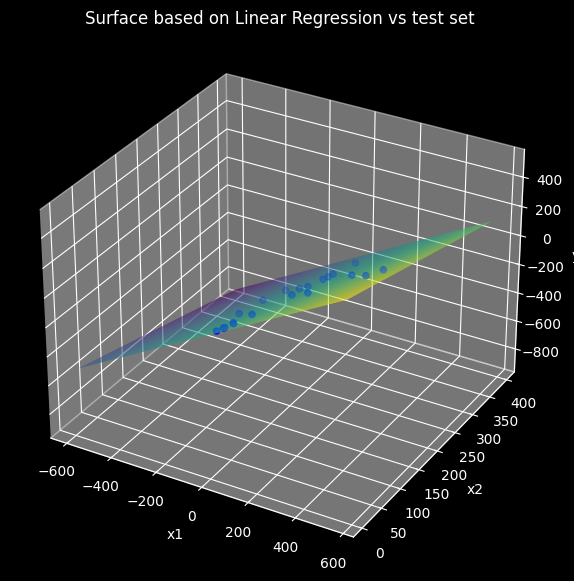

In [48]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['x1'], X_test['x2'], y_test['y'], color='blue')
ax.plot_surface(x1_grid, x2_grid, y_plane, alpha=0.7, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Surface based on Linear Regression vs test set')
ax.view_init(elev=30, azim=-60)
plt.show()

## <span style="color: cyan">zadanie 3

### Zadanie 3.1

In [49]:
df = pd.read_csv('advertising.csv', header=0)
X_adv = df.iloc[:, [0, 1, 2]]
y_adv = df['Sales']

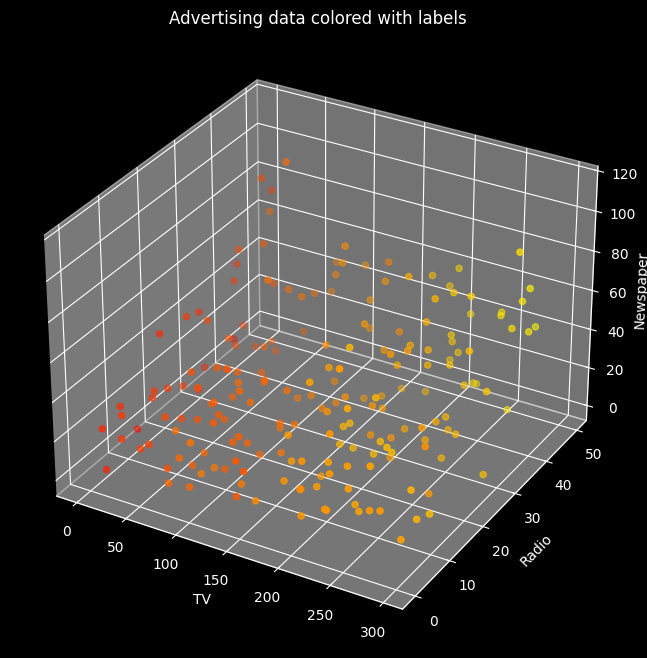

In [50]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_adv['TV'], X_adv['Radio'], X_adv['Newspaper'], c=y_adv, cmap='autumn')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper', labelpad=1)
ax.set_title('Advertising data colored with labels')
plt.show()

Aby sprawdzic zaleznosc pomiedzy danymi przedstawiony jest wykres 3D pokolorowany 4tym wymiarem danych (etykieta). Zauwazmy ze ulozone dane maja plynne przejscie kolorystyczne co wskazuje ze najprawdopodobniej sa one dobrze ulozone i moga tworzyc liniowa zaleznosc.

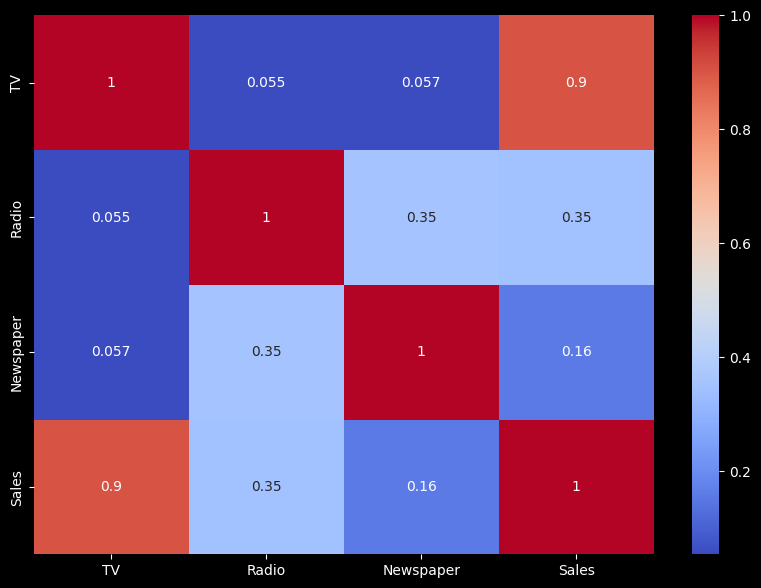

In [51]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Zauwazmy ze najbardziej do sprzedazy przyczynia sie telewizja, potem radio a na koncu gazety. Gazety slabo przyczyniaja sie bo korelacja to jedynie 0.16

### Zadanie 3.2 / 3.3

In [52]:
def get_result_entry(model, X, y, model_name='Custom'):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2_score = round(model.score(X, y), 5)

    return {'Model': model_name, 'MSE': mse, 'R2 Score': r2_score}

In [53]:
results_adv = []

X_adv_train, X_adv_test, y_adv_train, y_adv_test = train_test_split(
    X_adv, y_adv, test_size=0.2, random_state=42)
adv_lin_reg = LinearRegression()
adv_lin_reg.fit(X_adv_train, y_adv_train)

entry = get_result_entry(adv_lin_reg, X_adv_test, y_adv_test, model_name='Linear Regression')
results_adv.append(entry)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_adv_train, y_adv_train)

entry_test = get_result_entry(pipeline, X_adv_test, y_adv_test, model_name='Scaled LinReg')
results_adv.append(entry_test)

In [55]:
df_results = pd.DataFrame(results_adv)
print(df_results)

               Model       MSE  R2 Score
0  Linear Regression  2.907757    0.9059
1      Scaled LinReg  2.907757    0.9059


Zauwazmy ze nie ma roznicy miedzy modelem przeskalowanym a nie przeskalowanym. Linear Regression korzysta z jawnego rownania i pseudo odwracania macierzy wiec skala danych nie ma wplywu na wynik

## <span style="color: cyan">Zadanie 4

### Zadanie 4.1

In [56]:
df_data4 = pd.read_csv('data4.csv')

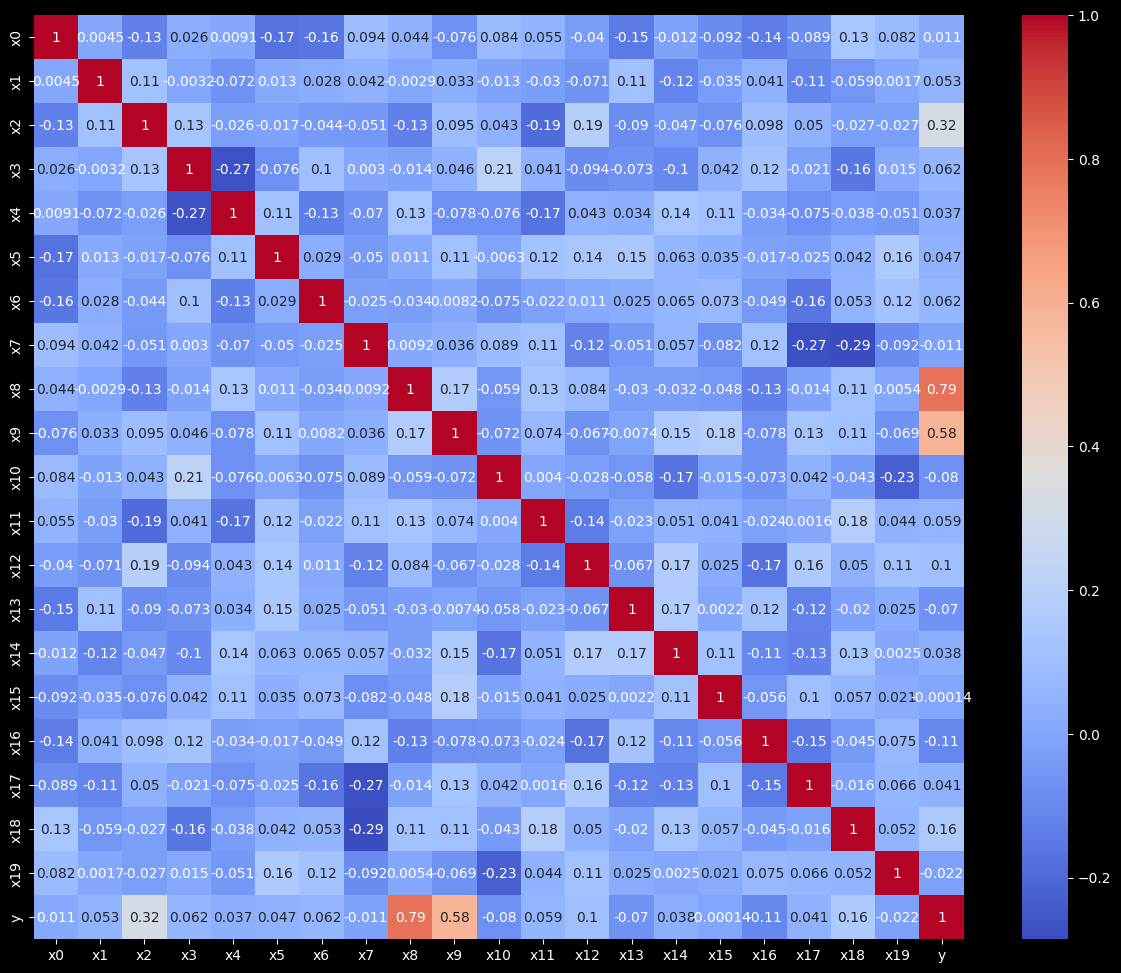

In [57]:
corr_data4 = df_data4.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_data4, annot=True, cmap='coolwarm')
plt.show()

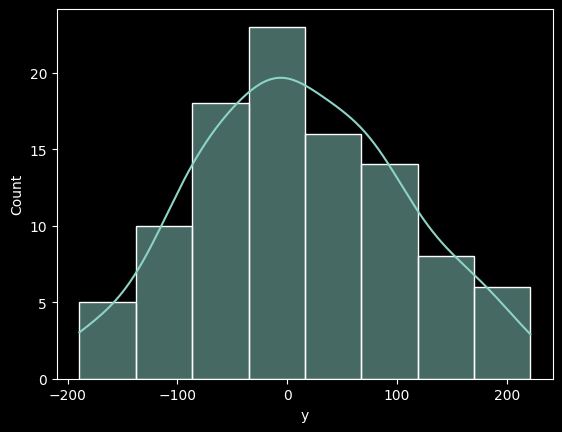

In [58]:
sns.histplot(df_data4['y'], kde=True)
plt.show()

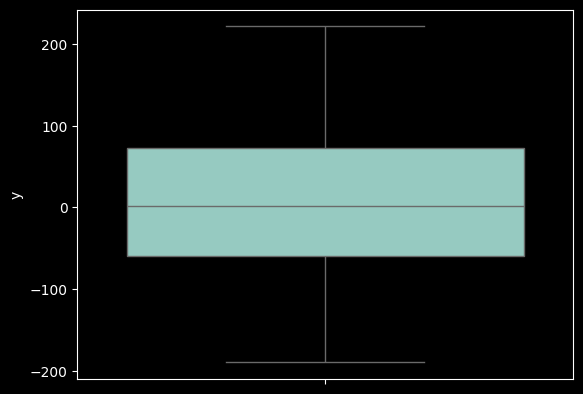

In [59]:
sns.boxplot(y=df_data4['y'])
plt.show()

Zauwazmy na heatmapie ze tak naprawde bardzo duzo cech jest zbedna i korelacja liniowa jest znikoma miedzy nimi a etykieta <br> <br>
Na pairplot widzimy tez ze nie ma miedzy tymi cechami jakiejs innej korelacji niz liniowe (te ktore mialy mala korelacje pearsona) i zwykle jest to po prostu taka chmura punktow <br> <br>
Z histogram etykiet i boxplot mamy informacje ze etykiety maja mniej wiecej rozklad normalny i sa symetrycznie rozlozone dane

### Zadanie 4.2/4.3

Najpierw wytrenujmy model nie usuwajac jeszcze zadnych zbednych wymiarow

In [60]:
X = df_data4.iloc[:, :20]
y = df_data4['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results_data4 = []

In [61]:
# Regresja zwykla
lin_reg_4 = make_pipeline(StandardScaler(), LinearRegression())
lin_reg_4.fit(X_train, y_train)
entry_reg = get_result_entry(lin_reg_4, X_test, y_test, 'Linear Regression (no changes)')
entry_reg_train = get_result_entry(lin_reg_4, X_train, y_train, 'LinReg (no changes) Train')
results_data4.append(entry_reg)
results_data4.append(entry_reg_train)

Bledy dzielenia przez zero bo macierz jest blisko nieodwracalna z racji bardzo bliskiej korelacji 1 niektorych cech <br>
Sprobuje wiec potem usunac te niektore wymiary

In [62]:
# Regresja ridge (l2 regularyzacja)
from sklearn.linear_model import Ridge

pipe = make_pipeline(StandardScaler(), Ridge(alpha=3))

model = pipe.fit(X_train, y_train)

entry_ridge_train = get_result_entry(model, X_train, y_train, 'Ridge (no changes) Train')
entry_ridge = get_result_entry(model, X_test, y_test, 'Ridge (no changes)')
results_data4.append(entry_ridge_train)
results_data4.append(entry_ridge)

<span style="color: lime; font-weight: bold"> Teraz sprobujmy wywalic cechy ktore sa zbedne

In [63]:
X_relevant = df_data4[['x2', 'x8', 'x9', 'x12', 'x18']]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_relevant, y, test_size=0.2, random_state=42)
lin_reg_relevant = make_pipeline(StandardScaler(), LinearRegression())
lin_reg_relevant.fit(X_train4, y_train4)

entry = get_result_entry(lin_reg_relevant, X_test4, y_test4, 'LinReg relevant')
results_data4.append(entry)

ridge_relevant = make_pipeline(StandardScaler(), Ridge(alpha=0.6))
ridge_relevant.fit(X_train4, y_train4)

relevant_ridge_entry = get_result_entry(ridge_relevant, X_test4, y_test4, 'Ridge relevant')
results_data4.append(relevant_ridge_entry)

### Porownanie modeli

In [64]:
results_data4 = pd.DataFrame(results_data4)
print(results_data4)

                            Model         MSE  R2 Score
0  Linear Regression (no changes)  232.826824   0.96899
1       LinReg (no changes) Train   48.500223   0.99458
2        Ridge (no changes) Train   60.309333   0.99327
3              Ridge (no changes)  232.934892   0.96897
4                 LinReg relevant  231.759249   0.96913
5                  Ridge relevant  232.497921   0.96903


Widac ze na danych z mniejsza liczba wymiarow wynik jest minimalnie gorszy jednak jak na to jak malo tracimy w porownaniu do tego ilu wymiarow sie pozbywamy moze byc oplacalne